In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
main_df=pd.read_csv("Titanic-Dataset.csv")
main_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df=main_df.copy()

# EDA #

In [7]:
df=df.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [11]:
np.ceil(0.1)

1.0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

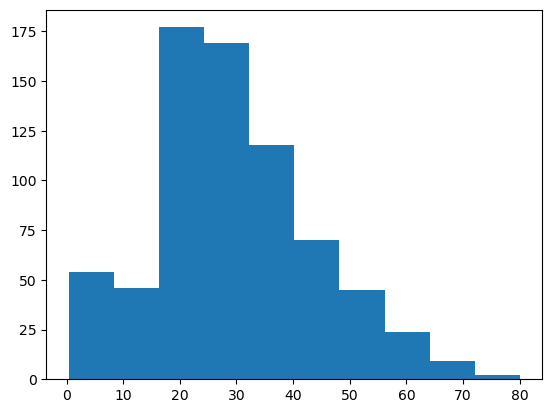

In [13]:
plt.hist(df.Age)

In [14]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
df["Age"]=df["Age"].apply(np.ceil)

In [17]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
 8   Embarked_C  891 non-null    bool   
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1abb183f710>,
 'caps': [<matplotlib.lines.Line2D at 0x1abb184d150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abb183eb90>],
 'medians': [<matplotlib.lines.Line2D at 0x1abb184e7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abb184f250>],
 'means': []}

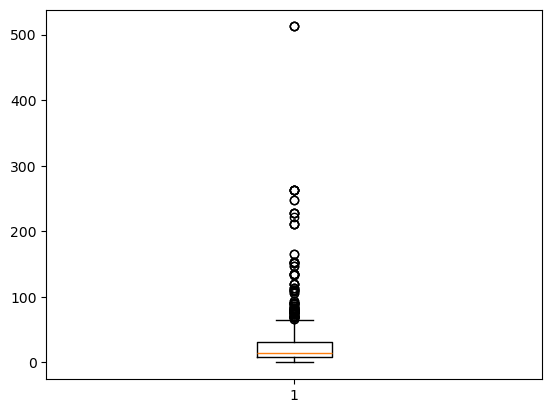

In [19]:
plt.boxplot(df.Fare)

In [20]:
df.loc[df.Fare>300,'Fare']=300

{'whiskers': [<matplotlib.lines.Line2D at 0x1abb1892010>,
 'caps': [<matplotlib.lines.Line2D at 0x1abb1893910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abb1891390>],
 'medians': [<matplotlib.lines.Line2D at 0x1abb189cf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abb189d890>],
 'means': []}

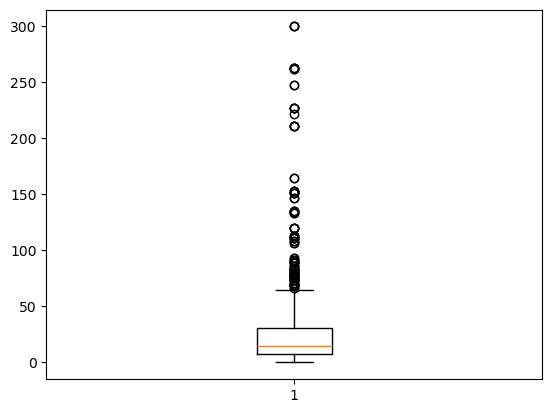

In [21]:
plt.boxplot(df.Fare)

In [22]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.373737,0.523008,0.381594,31.489295
std,0.486592,0.836071,13.019974,1.102743,0.806057,43.973014
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,300.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1abb1961350>,
 'caps': [<matplotlib.lines.Line2D at 0x1abb111f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abb1960650>],
 'medians': [<matplotlib.lines.Line2D at 0x1abb1963f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abb1964a90>],
 'means': []}

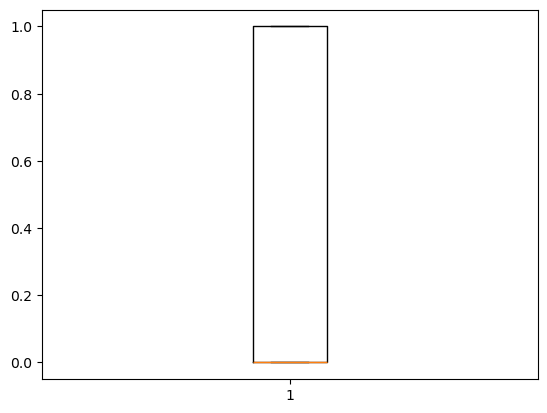

In [23]:
plt.boxplot(df.Survived)

In [24]:
df.duplicated().sum()

117

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.330748,-0.079278,-0.038445,0.069364,0.258665,0.515714,-0.515714,0.169909,-0.039653,-0.135374
Pclass,-0.330748,1.000000,-0.341761,0.087721,0.039596,-0.602886,-0.117725,0.117725,-0.249939,0.211451,0.107443
Age,-0.079278,-0.341761,1.000000,-0.280188,-0.183236,0.096620,-0.094690,0.094690,0.035672,-0.031783,-0.021738
SibSp,-0.038445,0.087721,-0.280188,1.000000,0.379320,0.160953,0.095092,-0.095092,-0.065556,-0.003586,0.063768
Parch,0.069364,0.039596,-0.183236,0.379320,1.000000,0.218003,0.234742,-0.234742,-0.024140,-0.066732,0.063687
Fare,0.258665,-0.602886,0.096620,0.160953,0.218003,1.000000,0.192798,-0.192798,0.276332,-0.119591,-0.182333
Sex_female,0.515714,-0.117725,-0.094690,0.095092,0.234742,0.192798,1.000000,-1.000000,0.083421,0.041700,-0.106459
Sex_male,-0.515714,0.117725,0.094690,-0.095092,-0.234742,-0.192798,-1.000000,1.000000,-0.083421,-0.041700,0.106459
Embarked_C,0.169909,-0.249939,0.035672,-0.065556,-0.024140,0.276332,0.083421,-0.083421,1.000000,-0.142422,-0.806877
Embarked_Q,-0.039653,0.211451,-0.031783,-0.003586,-0.066732,-0.119591,0.041700,-0.041700,-0.142422,1.000000,-0.458928


<Axes: >

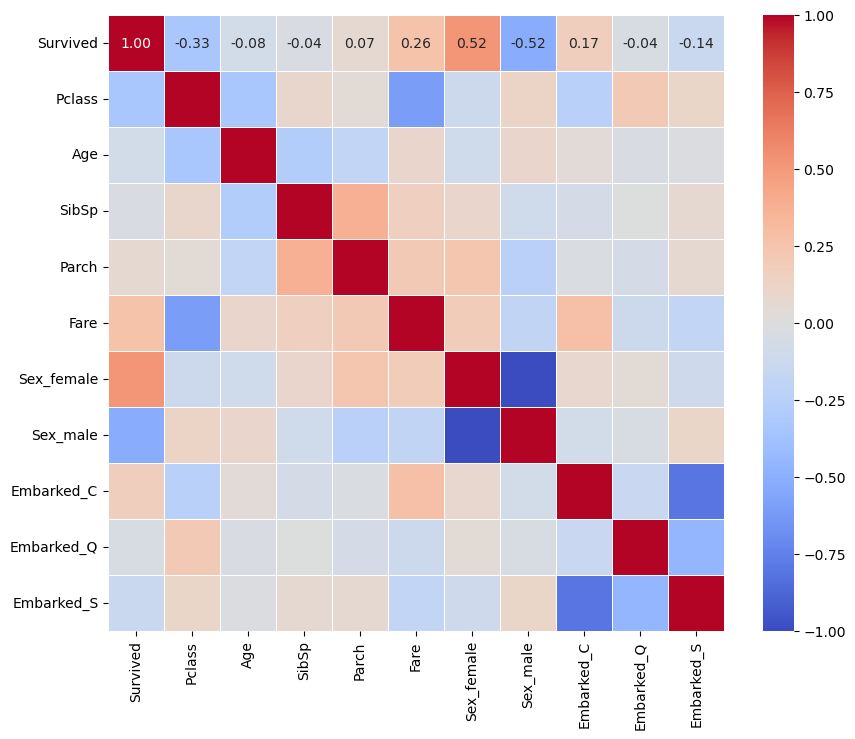

In [27]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

# Model using SVM #

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm  import SVC

In [29]:
feature = df.drop('Survived',axis=1)
label = df['Survived'].copy()

In [30]:
x_train,x_test,y_train,y_test = train_test_split(feature,label,train_size=0.8,random_state=44,shuffle=True)

In [31]:
SVM_model = SVC (kernel='linear')

In [32]:
SVM_model.fit(x_train,y_train)

SVC(kernel='linear')

In [33]:
print(classification_report(y_test,SVM_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        94
           1       0.75      0.70      0.73        61

    accuracy                           0.79       155
   macro avg       0.79      0.78      0.78       155
weighted avg       0.79      0.79      0.79       155



# Model using KNN #

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [35]:
# Example: Prepare features (X) and target (y)

x = df.drop('Survived',axis=1)
y = df['Survived'].copy()
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Optional: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
# Instantiate the KNN model with a specified number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Fit the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [37]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.72      0.64      0.68        56

    accuracy                           0.78       155
   macro avg       0.76      0.75      0.76       155
weighted avg       0.78      0.78      0.78       155



# Model using DecisionTree #

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
# Example: Prepare features (X) and target (y)
x = df.drop('Survived',axis=1)
y = df['Survived'].copy()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [40]:
dt = DecisionTreeClassifier()
min_samples_split_list = [10, 30,50]
max_depth_list = [6, 8, 16]
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_split':min_samples_split_list, 'max_depth':max_depth_list}
clf = GridSearchCV(dt, parameters)
clf.fit(x_train, y_train)
parm=clf.best_params_
parm

{'max_depth': 6, 'min_samples_split': 50}

In [41]:
# Instantiate the Decision Tree model
dt = DecisionTreeClassifier(max_depth=parm['max_depth'],min_samples_split=parm['min_samples_split'])


# Fit the model
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, min_samples_split=50)

In [42]:
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.73      0.54      0.62        56

    accuracy                           0.76       155
   macro avg       0.75      0.71      0.72       155
weighted avg       0.76      0.76      0.75       155

